# Několik odkazů do začátku

Instalace Pythonu

PythonXY
https://code.google.com/p/pythonxy/

WinPython
http://winpython.github.io/

Anaconda
https://store.continuum.io/cshop/anaconda/


Programování v Pythonu
http://pythonic.eu/fjfi/

Stránky našeho předmětu ZDO
http://www.kky.zcu.cz/cs/courses/zdo

Ukazky metod zpracovani obrazu
http://scipy-lectures.github.io/packages/scikit-image/


# Pusťme si ipython notebook

In [1]:
%pylab inline

# from pylab import *
import cStringIO
import urllib
import scipy
import scipy.misc
import skimage
import skimage.data
from skimage.filters import threshold_otsu, gaussian_filter
# from skimage.filter import threshold_otsu, gaussian_filter
from skimage.morphology import binary_closing, binary_erosion, binary_opening, label, binary_dilation
from skimage.measure import regionprops
from skimage.color import label2rgb
from skimage.io import imread
# import skimage.filter
# from skimage.filters import 


Populating the interactive namespace from numpy and matplotlib


## Trocha Pythonu

In [70]:
print "hello"

hello


In [71]:
def mojeFunkce(vstup):
    vystup = vstup + 6
    return vystup

mojeFunkce(5)

11

In [72]:
for i in range(2,5):
    print i

2
3
4


In [73]:
pole = ['Franta', 'Jakub', 'Marta']

for jmeno in pole:
    print jmeno

Franta
Jakub
Marta


## Načtení a zobrazení obrázku z URL

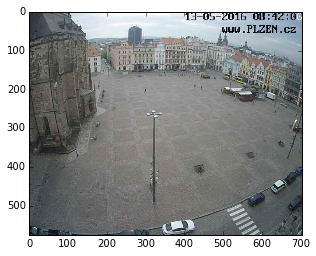

In [2]:
URL = "http://plzen.cz/kamera.php?0.8989779513794929"
img = imread(URL)

imshow(img)
# show()

### Zobrazení obrázku z kamery

In [3]:
URL = "http://uc452cam01-kky.fav.zcu.cz/snapshot.jpg"

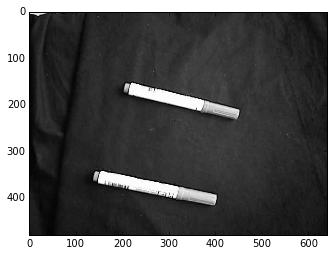

In [5]:
img = imread(URL, as_grey=True)
imshow(img, cmap='gray')

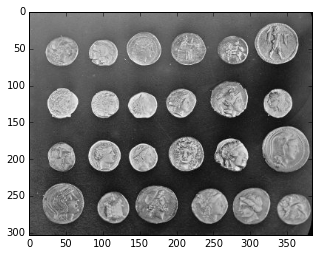

In [18]:
# ukazkova data
img = skimage.data.coins()
imshow(img, cmap='gray')


### Práce s obrazovými daty

In [7]:
img.shape

(303, 384)

In [8]:
img[50, 10]

111

In [80]:
img = img.astype(np.int)
img

array([[ 47, 123, 133, ...,  14,   3,  12],
       [ 93, 144, 145, ...,  12,   7,   7],
       [126, 147, 143, ...,   2,  13,   3],
       ..., 
       [ 81,  79,  74, ...,   6,   4,   7],
       [ 88,  82,  74, ...,   5,   7,   8],
       [ 91,  79,  68, ...,   4,  10,   7]])

In [81]:
img[10:20,15:20]

array([[126, 124, 126, 128, 129],
       [126, 121, 121, 124, 126],
       [125, 126, 124, 124, 125],
       [124, 127, 124, 123, 125],
       [122, 122, 122, 123, 125],
       [121, 123, 124, 126, 126],
       [124, 122, 123, 124, 124],
       [124, 121, 122, 123, 124],
       [124, 122, 122, 123, 123],
       [122, 122, 123, 123, 123]])

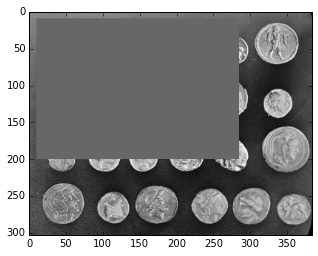

In [17]:
# img[10:200, 10:-100] = 100
imshow(img, cmap='gray')

# Filtrace

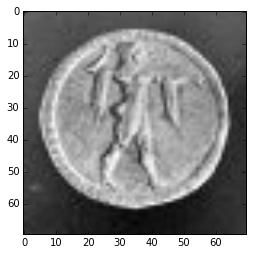

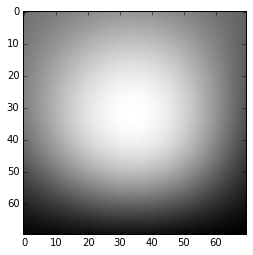

In [24]:
coins_zoom = img[10:80, 300:370]
from scipy import ndimage
gaussian_coins = gaussian_filter(coins_zoom, sigma=15)

imshow(coins_zoom, cmap='gray')
figure()
imshow(gaussian_coins, cmap='gray')

# Segmentace

[cviceni7](http://nbviewer.ipython.org/github/mjirik/ZDO/blob/master/ZDOcv7.ipynb)

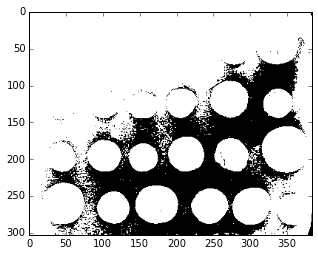

In [27]:
thrim = img > 50
imshow(thrim, cmap='gray')

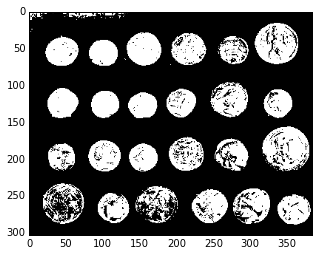

In [28]:
imshow(img > 130, cmap='gray')

## Barveni obrazu - label

/home/mjirik/miniconda2/lib/python2.7/site-packages/skimage/measure/_label.py:4: skimage_deprecation: Call to deprecated function ``label``. Use ``skimage.measure.label`` instead.
  connectivity=None):


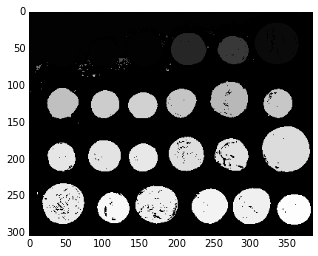

In [29]:
# blobs_labels = skimage.morphology.label(img, background=0)
imlabel = label(img > 100, background=0)
imshow(imlabel, cmap='gray')

In [31]:
np.unique(imlabel)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
       50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66,
       67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83,
       84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [32]:
# pocet labelu
print np.max(imlabel)

99


### Zobrazení jednoho objektu

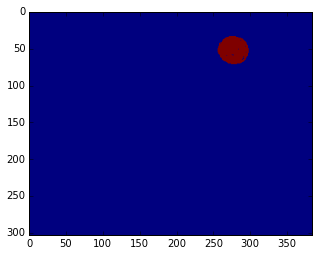

In [37]:
imshow(imlabel==21)

### Barevná vizualizace

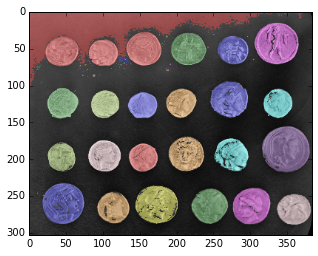

In [30]:
# Barevne provedeni
image_label_overlay = label2rgb(imlabel, image=np.uint8(img))
plt.imshow(image_label_overlay)

## Optimální volba volba prahu - Otsu

http://scikit-image.org/docs/dev/auto_examples/plot_otsu.html

In [41]:
thr = threshold_otsu(img)
thr

107

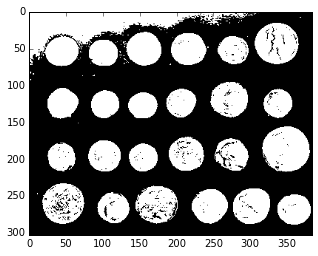

In [42]:
imthr = img > thr
imshow(imthr, cmap='gray')

Spocitame pocet objektu?

# Morfologicke operace

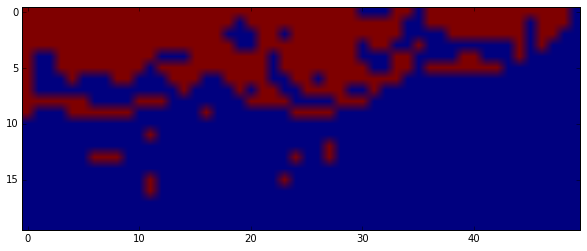

In [47]:
plt.figure(figsize(10,10))
imshow(imthr[0:20,260:310])

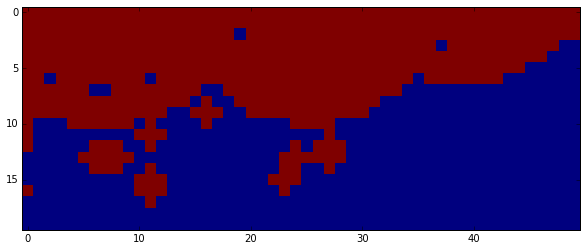

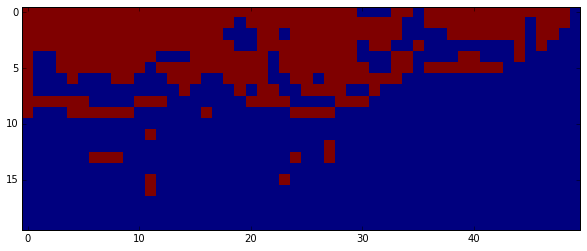

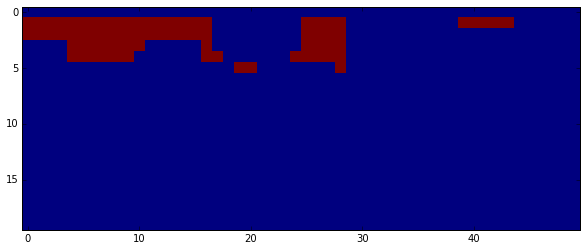

In [53]:

imer = binary_erosion(imthr)
imdil = binary_dilation(imthr) #,iterations=3)

element = ones([3,3])
imer = binary_erosion(imthr, element)

# imdil = binary_dilation(imdil)
# imdil = binary_dilation(imdil)


imshow(imdil[0:20,260:310], interpolation='nearest')
figure()
imshow(imthr[0:20,260:310], interpolation='nearest')
figure()
imshow(imer[0:20,260:310], interpolation='nearest')

In [110]:
ones([5,5])

array([[ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.]])

Pocet prekryvajicich se objektu?

# Popis objektu

[cviceni8](http://nbviewer.ipython.org/github/mjirik/ZDO/blob/master/ZDOcv8.ipynb)

* Velikost
* Eulerovo číslo 
    $$E = S - N$$
    kde $S$ je počet souvislých oblastí a $N$ je počet děr
* Výška, šířka
* Projekce
![projekce0](http://www.kky.zcu.cz/uploads/courses/zdo/lesson7/projekce.jpg)
![projekce1](http://www.kky.zcu.cz/uploads/courses/zdo/lesson7/projekce2.jpg)

* Výstřednost - poměr délek nejdelší tětivy a nejdelší tětivy k ní kolmé
* Podlouhlost
* Pravoúhlost
* Směr
* Nekompaktnost 
    $$\textrm{nekompaktnost}=\frac{(\textrm{délka hranice})^2}{\textrm{velikost}}$$


Využijeme funkce [regionprops](http://scikit-image.org/docs/dev/api/skimage.measure.html#skimage.measure.regionprops). 

Centroid  (127.27190605239386, 153.51942186088527)
Plocha  1107.0
Obvod  122.811183182


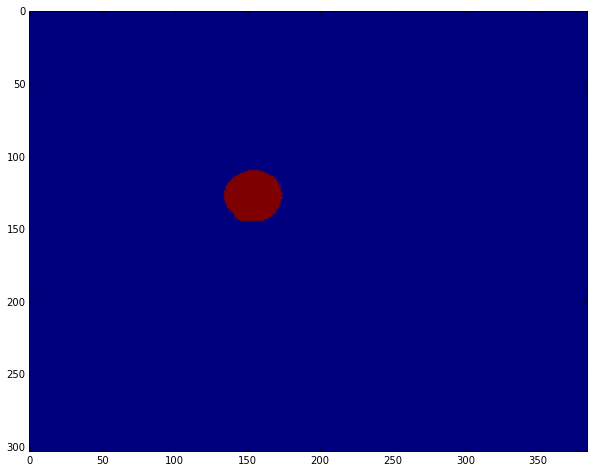

In [60]:
objnumber = 81

imshow(imlabel==objnumber)
# print np.unique(imlabel)

props = regionprops(imlabel+1)

print "Centroid ", props[objnumber].centroid
print "Plocha ", props[objnumber].area
print "Obvod ", props[objnumber].perimeter


# Zadani

Spocitejte kolik objektu urciteho typu se objevuje na obrazku z webkamery. Rozeznavame nasledujici typy objektu:

* Kolecko
* Ctvrec
* Obdelnik
* Hvezda

Trenovaci data naleznete [zde](https://github.com/mjirik/ZDO/tree/master/objekty)


![ukazka](https://github.com/mjirik/ZDO/blob/master/objekty/01.jpg?raw=true)